# edge image

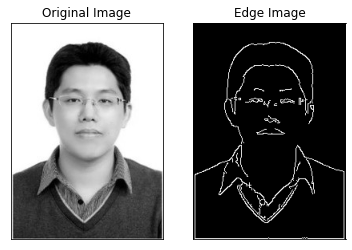

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('czh.jpg',0)
# img = cv2.imread('3.jpg',0)
edges = cv2.Canny(img,150,400)

# canny edge image
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [2]:
# from skimage.color import rgb2lab, lab2rgb
# import matplotlib.pyplot as plt
# img = cv2.imread('czh.jpg')
# img = cv2.imread('3.jpg')
# img1 = img/255.0
# img_lab = rgb2lab(img1)
# img_lab = lab2rgb(img_lab)
# cv2.imshow('123',img_lab)  
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [3]:
# print(img)
print(edges)
# print(img_lab)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 255 ... 255   0   0]
 [  0   0 255 ... 255   0   0]
 [  0   0 255 ... 255   0   0]]


In [4]:
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# blend = cv2.addWeighted(255-edges,0.4,img_gray,0.6,0)
# cv2.imshow('123',blend)  
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# k-means clustering test

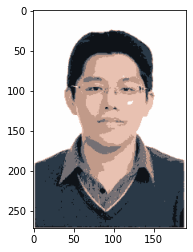

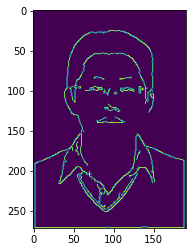

In [20]:
import copy
# convert to RGB
image = cv2.imread('czh.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3)) # -1 means to suit the other parameter to guarantee correct size
# convert to float
pixel_values = np.float32(pixel_values)

# print(pixel_values.shape)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
k = 6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
kmimg = copy.deepcopy(segmented_image)
plt.imshow(kmimg)
plt.show()
plt.imshow(edges)

In [21]:
print(segmented_image.shape)
print(segmented_image[1,3])

(272, 191, 3)
[254 254 254]


In [22]:
x = ([1,2],[3,4],[5,6],[7,8])
x = np.array(x)
x.reshape((2, -1))

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

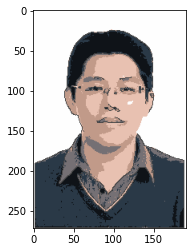

In [23]:

for i in range(0,segmented_image.shape[0]):
    for j in range(0,segmented_image.shape[1]):
        if edges[i,j] == 255:
            segmented_image[i,j] = [70,70,70] # set the line as gray
plt.imshow(segmented_image)
plt.show()

(Text(0.5, 1.0, 'Final result'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

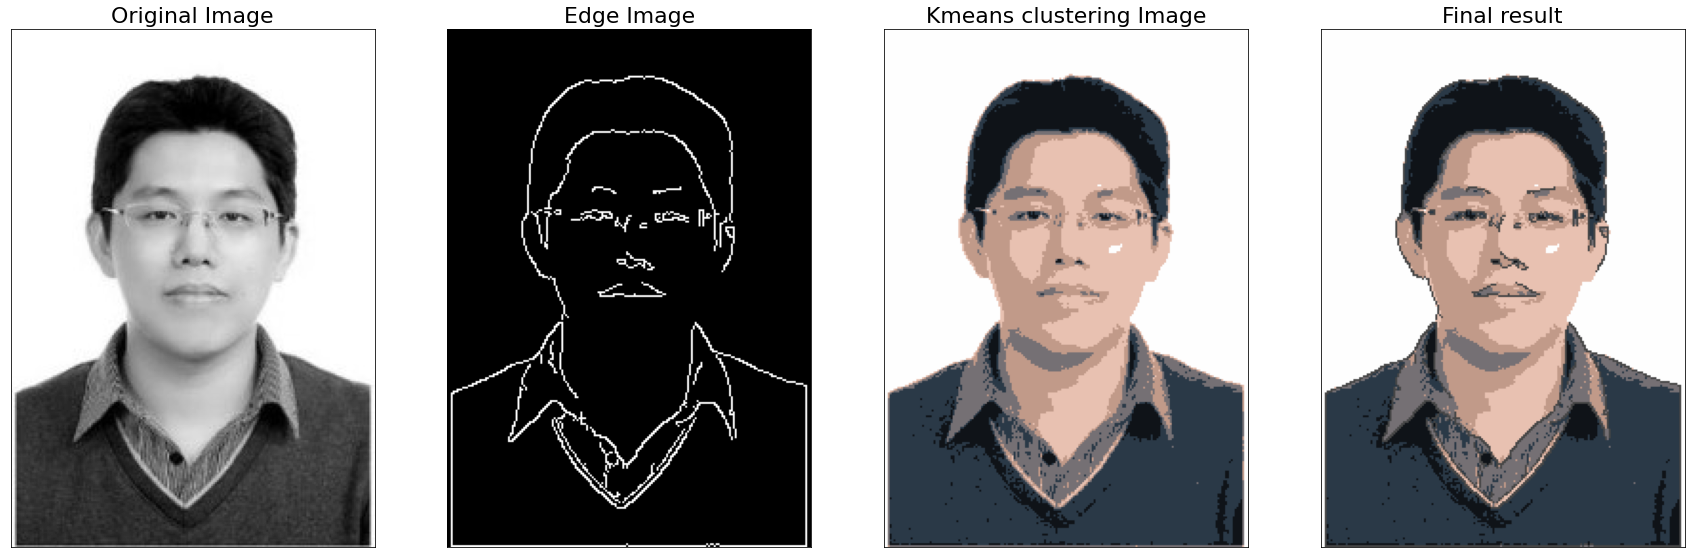

In [24]:
f, axs = plt.subplots(1,4,figsize=(30,30))
size = 22
plt.subplot(141),plt.imshow(img,cmap = 'gray')
plt.title('Original Image',fontsize=size), plt.xticks([]), plt.yticks([])

plt.subplot(142),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image',fontsize=size), plt.xticks([]), plt.yticks([])

plt.subplot(143),plt.imshow(kmimg)
plt.title('Kmeans clustering Image',fontsize=size), plt.xticks([]), plt.yticks([])

plt.subplot(144),plt.imshow(segmented_image)
plt.title('Final result',fontsize=size), plt.xticks([]), plt.yticks([])

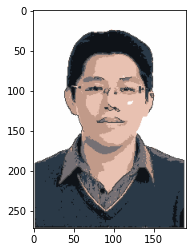

In [10]:
plt.imshow(segmented_image)

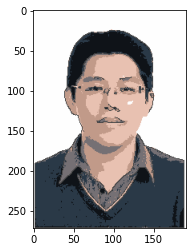

In [17]:
plt.imshow(kmimg)